In [85]:
import numpy as np
import matplotlib.pyplot as plt
import wandb
import pdb

In [99]:
def get_val_metrics(runs, index, exclude_keyword='ignore'):
    run_f1_scores = {}
    run_auroc_val_scores = {}
    
    for run in runs:
        # print(run.name)
        if exclude_keyword.lower() not in run.name.lower():

            history = run.history(pandas=True)
            # pdb.set_trace()
            # print(run.id)
            val_f1_scores = history['f1_val'].dropna().tolist()
            auroc_val_scores = history['auroc_val'].dropna().tolist()
            
            run_f1_scores[run.id] = val_f1_scores
            run_auroc_val_scores[run.id] = auroc_val_scores
    
    mean_f1_scores = [f1_scores[index] for f1_scores in run_f1_scores.values()]
    mean_auroc_val_scores = [auroc_val_scores[index] for auroc_val_scores in run_auroc_val_scores.values()]
    
    overall_mean_f1 = np.mean(mean_f1_scores)
    overall_std_f1 = np.std(mean_f1_scores)
    
    overall_mean_auroc_val = np.mean(mean_auroc_val_scores)
    overall_std_auroc_val = np.std(mean_auroc_val_scores)
    
    print(f"Mean F1 score for the {index}th epoch across all runs: {overall_mean_f1:.4f}")
    print(f"Std. F1 score for the {index}th epoch across all runs: {overall_std_f1:.4f}")
    
    print(f"Mean AUROC VAL score for the {index}th epoch across all runs: {overall_mean_auroc_val:.4f}")
    print(f"Std. AUROC VAL score for the {index}th epoch across all runs: {overall_std_auroc_val:.4f}")
    return list(run_f1_scores.values()), list(run_auroc_val_scores.values())

In [30]:
wandb.init(mode='disabled')

# transformer

In [31]:
entity = 'cell-x'
project = 'g0-arrest-uni-cv5'

runs1 = wandb.Api().runs(f"{entity}/{project}")


In [32]:
entity = 'cell-x'
project = 'g0-arrest-resnet50-cv5'
runs2 =  wandb.Api().runs(f"{entity}/{project}")

In [33]:
entity = 'cell-x'
project = 'g0-arrest-gigapath-cv5'
runs3 =  wandb.Api().runs(f"{entity}/{project}")

In [34]:
# def get_f1_mean_val(runs, index):
    
#     run_f1_scores = {}
#     run_auroc_val_scores = {}
#     # Iterate over the runs
#     for run in runs:
#         # Retrieve the run history for the current run
#         history = run.history(pandas=True)
        
#         # Extract the validation F1 scores from the history
#         val_f1_scores = history['f1_val'].dropna().tolist()
#         auroc_val_scores = history['auroc_val'].dropna().tolist()
        
#         # Store the validation F1 scores for the current run
#         run_f1_scores[run.id] = val_f1_scores
#         run_auroc_val_scores[run.id] = auroc_val_scores

#     # # Print the validation F1 scores for each run
#     # for run_id, f1_scores in run_f1_scores.items():
#     #     print(f"Run ID: {run_id}")
#     #     print(f"Validation F1 Scores: {f1_scores}")
#     #     print()
#     mean_f1_scores = []
#     mean_auroc_val_scores = []
    
#     index += 1
#     for run_id, f1_scores in run_f1_scores.items():
#         # Get the F1 score for the 7th epoch
#         f1_ith_epoch = f1_scores[index]  # Assuming 0-based indexing
        
#         # Append the F1 score to the list
#         mean_f1_scores.append(f1_ith_epoch)
#         mean_auroc_val_scores.append(run_auroc_val_scores[run_id][index])
#     # Compute the mean of the F1 scores for the ith epoch
#     overall_mean_f1 = np.mean(mean_f1_scores)
#     overall_std_f1 = np.std(mean_f1_scores)


#     overall_mean_auroc_val = np.mean(mean_auroc_val_scores)
#     overall_std_auroc_val  = np.std(mean_auroc_val_scores)

#     print(f"Mean F1 score for the {index}th epoch across all runs: {overall_mean_f1:.4f}")
#     print(f"Std. F1 score for the {index}th epoch across all runs: {overall_std_f1:.4f}")

#     print(f"Mean AUROC VAL score for the {index}th epoch across all runs: {overall_mean_auroc_val:.4f}")
#     print(f"Std. AUROC VAL score for the {index}th epoch across all runs: {overall_std_auroc_val:.4f}")

In [35]:
uni_f1_scores, uni_aurocval_scores = get_val_metrics(runs=runs1, index=8)
resnet50_f1_scores, resnet50_aurocval_scores = get_val_metrics(runs=runs2, index=8)
gigapath_f1_scores, gigapath_aurocval_scores = get_val_metrics(runs=runs3, index=8)


Mean F1 score for the 8th epoch across all runs: 0.6786
Std. F1 score for the 8th epoch across all runs: 0.0299
Mean AUROC VAL score for the 8th epoch across all runs: 0.7318
Std. AUROC VAL score for the 8th epoch across all runs: 0.0339
Mean F1 score for the 8th epoch across all runs: 0.6691
Std. F1 score for the 8th epoch across all runs: 0.0415
Mean AUROC VAL score for the 8th epoch across all runs: 0.7426
Std. AUROC VAL score for the 8th epoch across all runs: 0.0260
Mean F1 score for the 8th epoch across all runs: 0.6584
Std. F1 score for the 8th epoch across all runs: 0.0520
Mean AUROC VAL score for the 8th epoch across all runs: 0.7425
Std. AUROC VAL score for the 8th epoch across all runs: 0.0263


In [44]:
len(uni_f1_scores[1])
uni_f1_scores[0]

[0.4888888895511627,
 0.6717557311058044,
 0.6545454263687134,
 0.678260862827301,
 0.6274510025978088,
 0.6842105388641357,
 0.6542056202888489,
 0.6666666865348816,
 0.6666666865348816]

# f1 scores

In [60]:
uni_f1_scores
def get_mean_std(scores):
    means = [np.mean([sublist[i] for sublist in scores]) for i in range(len(scores[0]))]
    stds = [np.std([sublist[i] for sublist in scores]) for i in range(len(scores[0]))]
    return means, stds
# uni_means = [np.mean([sublist[i] for sublist in uni_f1_scores]) for i in range(len(uni_f1_scores[0]))]
# uni_stds = [np.std([sublist[i] for sublist in uni_f1_scores]) for i in range(len(uni_f1_scores[0]))]
# resnet50_means = [np.mean([sublist[i] for sublist in resnet50_f1_scores]) for i in range(len(resnet50_f1_scores[0]))]
# resnet50_stds = [np.std([sublist[i] for sublist in resnet50_f1_scores]) for i in range(len(resnet50_f1_scores[0]))]
# gigapath_means = [np.mean([sublist[i] for sublist in gigapath_f1_scores]) for i in range(len(gigapath_f1_scores[0]))]
# gigapath_stds = [np.std([sublist[i] for sublist in gigapath_f1_scores]) for i in range(len(gigapath_f1_scores[0]))]
uni_means, uni_stds = get_mean_std(uni_f1_scores)
resnet50_means, resnet50_stds = get_mean_std(resnet50_f1_scores)
gigapath_means, gigapath_stds = get_mean_std(gigapath_f1_scores)

In [102]:
def plot_results(uni_res, resnet_res, gigapath_res, title):
    # Create the x-axis values
    

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    resnet50_means, resnet50_stds = resnet_res
    uni_means, uni_stds = uni_res
    gigapath_means, gigapath_stds = gigapath_res
    
    x = range(0, len(resnet50_means))
    # Plot the mean with error bars
    ax.errorbar(x, resnet50_means, yerr=resnet50_stds, fmt='o', capsize=5, color='r')
    ax.errorbar(x, uni_means, yerr=uni_stds, fmt='x', capsize=5, color='b')
    ax.errorbar(x, gigapath_means, yerr=gigapath_stds, fmt='s', capsize=5, color='g')

    # Connect the mean values with lines
    ax.plot(x, resnet50_means, linestyle='-', color='r', label='resnet50')
    ax.plot(x, uni_means, linestyle='--', color='b', label='uni')
    ax.plot(x, gigapath_means, linestyle='-.', color='g', label='gigapath')


    # Add labels for the mean values
    # for i, mean in enumerate(uni_means):
    #     ax.annotate(f"{mean:.2f}", (i, mean), xytext=(0, 10), textcoords="offset points", ha="center")
    ax.legend()

    # Set the axis labels and title
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean CV score')
    ax.set_title(f'{title}')

    # Set the x-axis ticks
    ax.set_xticks(x)

    # Show the plot
    plt.show()

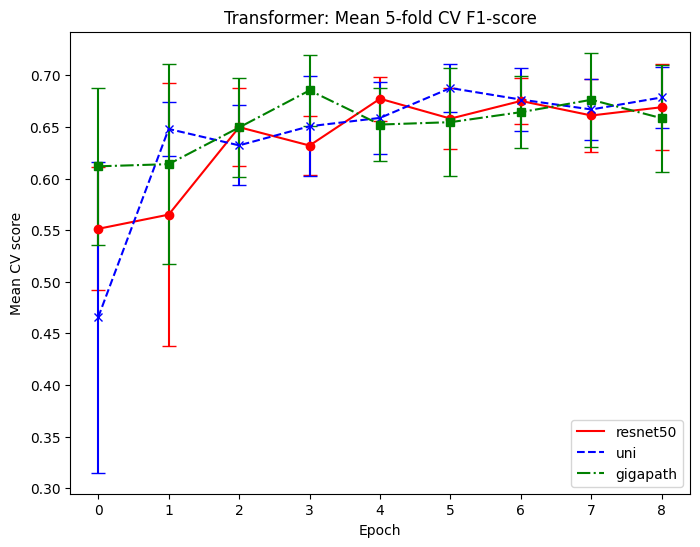

In [103]:
# get_val_metrics(runs=runs1, index=6)
plot_results(uni_res = [uni_means, uni_stds], resnet_res = [resnet50_means, resnet50_stds], gigapath_res = [gigapath_means, gigapath_stds], title = 'Transformer: Mean 5-fold CV F1-score')


In [117]:
auroc_uni_means, auroc_uni_stds = get_mean_std(uni_aurocval_scores)
auroc_resnet50_means, auroc_resnet50_stds = get_mean_std(resnet50_aurocval_scores)
auroc_gigapath_means, auroc_gigapath_stds = get_mean_std(gigapath_aurocval_scores)

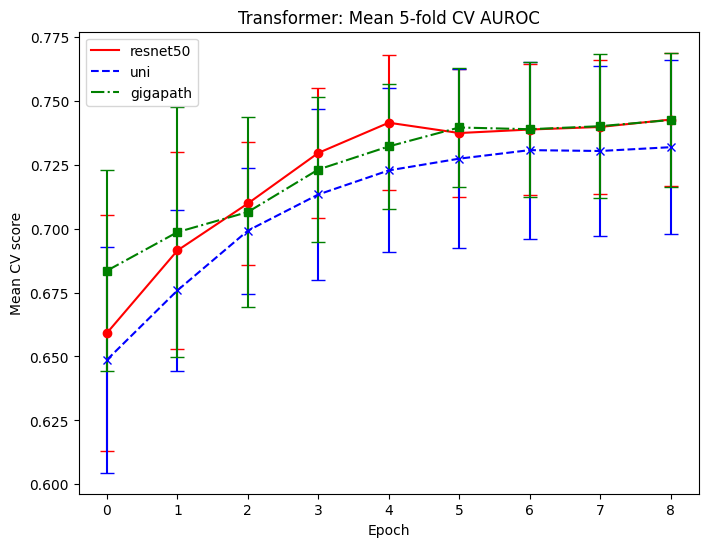

In [118]:
plot_results(uni_res = [auroc_uni_means, auroc_uni_stds], resnet_res = [auroc_resnet50_means, auroc_resnet50_stds], gigapath_res = [auroc_gigapath_means, auroc_gigapath_stds], title = 'Transformer: Mean 5-fold CV AUROC')


# TransMIL

In [108]:
entity = 'cell-x'
project = 'g0-arrest-resnet50-transmil-cv5'

runs1 = wandb.Api().runs(f"{entity}/{project}")


In [109]:
entity = 'cell-x'
project = 'g0-arrest-uni-transmil-cv5'
runs2 =  wandb.Api().runs(f"{entity}/{project}")

In [110]:
entity = 'cell-x'
project = 'g0-arrest-gigapath-transmil-cv5'
runs3 =  wandb.Api().runs(f"{entity}/{project}")

In [111]:
resnet50_f1_scores_transmil, resnet50_aurocval_scores_transmil = get_val_metrics(runs=runs1, index=8)
uni_f1_scores_transmil, uni_aurocval_scores_transmil = get_val_metrics(runs=runs2, index=8)
gigapath_f1_scores_transmil, gigapath_aurocval_scores_transmil = get_val_metrics(runs=runs3, index=8)


Mean F1 score for the 8th epoch across all runs: 0.6684
Std. F1 score for the 8th epoch across all runs: 0.0598
Mean AUROC VAL score for the 8th epoch across all runs: 0.7373
Std. AUROC VAL score for the 8th epoch across all runs: 0.0330
Mean F1 score for the 8th epoch across all runs: 0.6827
Std. F1 score for the 8th epoch across all runs: 0.0505
Mean AUROC VAL score for the 8th epoch across all runs: 0.7429
Std. AUROC VAL score for the 8th epoch across all runs: 0.0398
Mean F1 score for the 8th epoch across all runs: 0.6724
Std. F1 score for the 8th epoch across all runs: 0.0606
Mean AUROC VAL score for the 8th epoch across all runs: 0.7351
Std. AUROC VAL score for the 8th epoch across all runs: 0.0319


In [112]:

resnet50_means_transmil, resnet50_stds_transmil = get_mean_std(resnet50_f1_scores_transmil)
uni_means_transmil, uni_stds_transmil = get_mean_std(uni_f1_scores_transmil)
gigapath_means_transmil, gigapath_stds_transmil = get_mean_std(gigapath_f1_scores_transmil)

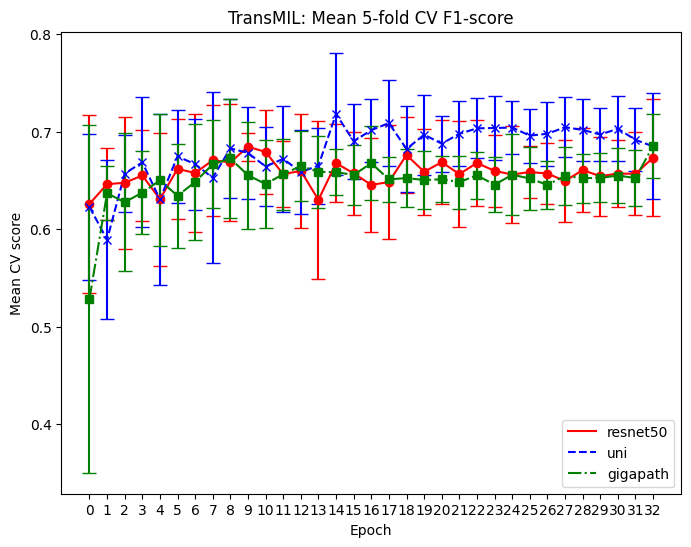

In [113]:
plot_results(resnet_res = [resnet50_means_transmil, resnet50_stds_transmil], \
            uni_res = [uni_means_transmil, uni_stds_transmil], \
            gigapath_res = [gigapath_means_transmil, gigapath_stds_transmil], title = 'TransMIL: Mean 5-fold CV F1-score')


In [114]:

resnet50_means_transmil, resnet50_stds_transmil = get_mean_std(resnet50_aurocval_scores_transmil)
uni_means_transmil, uni_stds_transmil = get_mean_std(uni_aurocval_scores_transmil)
gigapath_means_transmil, gigapath_stds_transmil = get_mean_std(gigapath_aurocval_scores_transmil)

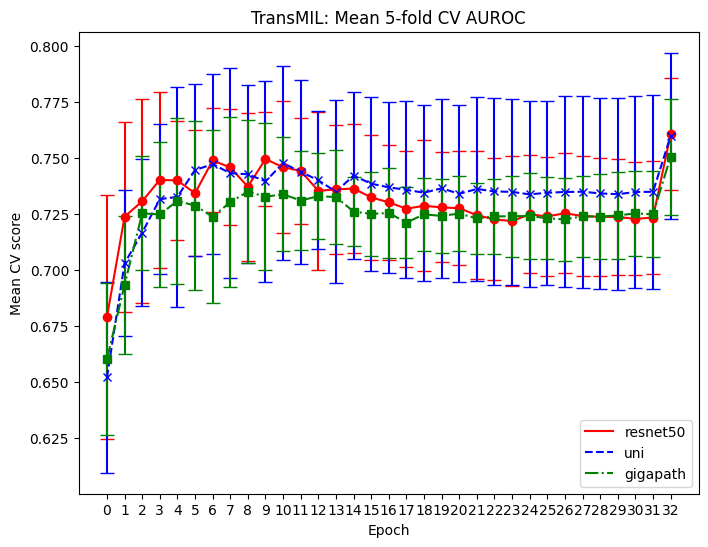

In [115]:
plot_results(resnet_res = [resnet50_means_transmil, resnet50_stds_transmil], \
            uni_res = [uni_means_transmil, uni_stds_transmil], \
            gigapath_res = [gigapath_means_transmil, gigapath_stds_transmil], title = 'TransMIL: Mean 5-fold CV AUROC')


In [52]:
wandb.finish()

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
